<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/7_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Funciones utilitarias

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g

In [3]:
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [4]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

##Matriz de adyacencia

Version binaria

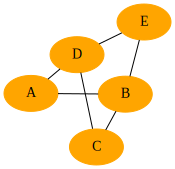

In [5]:
name = ["A","B","C","D","E"]
M1 = [[0, 1, 0, 1, 0],
      [1, 0, 1, 0, 1],
      [0, 1, 0, 1, 0],
      [1, 0, 1, 0, 1],
      [0, 1, 0, 1, 0]]
  
adjmShow(np.array(M1), labels=name)

In [6]:
%%file 1.adjm
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0

Writing 1.adjm


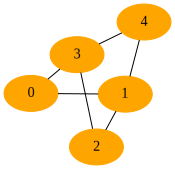

In [7]:
M2 = np.loadtxt("1.adjm", dtype=np.int)
adjmShow(M2)

Version con pesos

In [8]:
%%file 3.adjm
x 2 x -3 x
2 x 4 x 3
x 4 x 5 x
-3 x 5 x 1
x 3 x 1 x

Writing 3.adjm


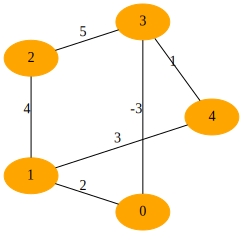

In [9]:
df = pd.read_csv("3.adjm", sep=" ", header=None).replace("x", np.nan)
M3 = df.to_numpy().astype(np.float)
adjmShow(M3, weighted=True, layout="circo")

In [10]:
print(M3)

[[nan  2. nan -3. nan]
 [ 2. nan  4. nan  3.]
 [nan  4. nan  5. nan]
 [-3. nan  5. nan  1.]
 [nan  3. nan  1. nan]]


##Grafos dirigidos

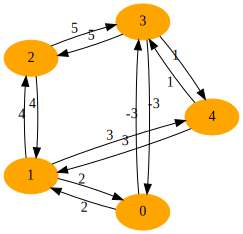

In [11]:
adjmShow(M3, directed=True, weighted=True, layout="circo")

In [12]:
%%file 4.adjm
x 2 x -3 x
x x x x x
x 4 x 5 x
x x x x x
x 3 x 1 x

Writing 4.adjm


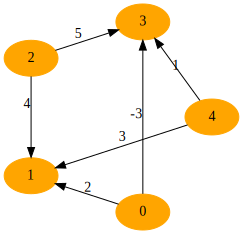

In [13]:
df = pd.read_csv("4.adjm", sep=" ", header=None).replace("x", np.nan)
M4 = df.to_numpy().astype(np.float)
adjmShow(M4, directed=True, weighted=True, layout="circo")

##Procesando matrices de adyacencia

Verificando nodos

In [14]:
n = len(M2)
print("Tamaño de matriz", n, "*",n)
print("Nodos (desde 0 hasta n-1): ")
for u in range(n):
  print("Nodo",u)

Tamaño de matriz 5 * 5
Nodos (desde 0 hasta n-1): 
Nodo 0
Nodo 1
Nodo 2
Nodo 3
Nodo 4


Verificando aristas

In [15]:
for u in range(n):
  for v in range(n):
    if (M2[u,v] == 1):
      print("Arista desde nodo", u,"hasta nodo", v)

Arista desde nodo 0 hasta nodo 1
Arista desde nodo 0 hasta nodo 3
Arista desde nodo 1 hasta nodo 0
Arista desde nodo 1 hasta nodo 2
Arista desde nodo 1 hasta nodo 4
Arista desde nodo 2 hasta nodo 1
Arista desde nodo 2 hasta nodo 3
Arista desde nodo 3 hasta nodo 0
Arista desde nodo 3 hasta nodo 2
Arista desde nodo 3 hasta nodo 4
Arista desde nodo 4 hasta nodo 1
Arista desde nodo 4 hasta nodo 3


Verificando en matriz de adyacencia con pesos

In [16]:
for u in range(n):
  for v in range(n):
    if not np.isnan(M4[u, v]):
      print(f"Arista desde nodo {u} hasta nodo {v} con peso {M4[u, v]}")

Arista desde nodo 0 hasta nodo 1 con peso 2.0
Arista desde nodo 0 hasta nodo 3 con peso -3.0
Arista desde nodo 2 hasta nodo 1 con peso 4.0
Arista desde nodo 2 hasta nodo 3 con peso 5.0
Arista desde nodo 4 hasta nodo 1 con peso 3.0
Arista desde nodo 4 hasta nodo 3 con peso 1.0


##Lista de adyacencia

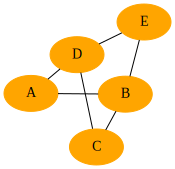

In [17]:
L1 = [[1, 3],
      [0, 2, 4],
      [1, 3],
      [0, 2, 4],
      [1, 3]]
adjlShow(L1, labels=["A", "B", "C", "D", "E"])

In [18]:
%%file 2.adjl
A B C D E
1 3
0 2 4
1 3
0 2 4
1 3

Writing 2.adjl


[1, 3]
[0, 2, 4]
[1, 3]
[0, 2, 4]
[1, 3]


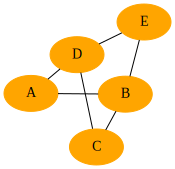

In [19]:
L2, labels = readAdjl("2.adjl", haslabels=True)
for l in L2:
  print(l)
adjlShow(L2, labels=labels)

Lista de adyacencia con pesos

In [20]:
%%file 3.adjl
A B C D E
1|2 3|-3

1|4 3|5

1|3 3|1

Writing 3.adjl


[(1, 2), (3, -3)]
[]
[(1, 4), (3, 5)]
[]
[(1, 3), (3, 1)]


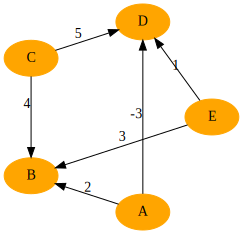

In [21]:
L3, labels = readAdjl("3.adjl", haslabels=True, weighted=True)
for l in L3:
  print(l)
adjlShow(L3, labels=labels, directed=True, weighted=True, layout="circo")

##Procesando lista de adyacencia

Verificando nodos

In [22]:
n = len(L2)
for u in range(n):
  print(f"Node {u}")

Node 0
Node 1
Node 2
Node 3
Node 4


Verificando aristas

In [23]:
for u in range(n):
  for v in L2[u]:
    print(f"Edge from node {u} to node {v}")

Edge from node 0 to node 1
Edge from node 0 to node 3
Edge from node 1 to node 0
Edge from node 1 to node 2
Edge from node 1 to node 4
Edge from node 2 to node 1
Edge from node 2 to node 3
Edge from node 3 to node 0
Edge from node 3 to node 2
Edge from node 3 to node 4
Edge from node 4 to node 1
Edge from node 4 to node 3


Verificando aristas en lista de adyancencia con pesos

In [24]:
for u in range(n):
  for v, w in L3[u]:
    print(f"Edge from node {u} to node {v} with weight {w}")

Edge from node 0 to node 1 with weight 2
Edge from node 0 to node 3 with weight -3
Edge from node 2 to node 1 with weight 4
Edge from node 2 to node 3 with weight 5
Edge from node 4 to node 1 with weight 3
Edge from node 4 to node 3 with weight 1


##Ejercicio en clase

In [25]:
%%file ejercicio.adjl
0 1 2 3 4 5 6 7
1 4       
0 2 3
1 5
1
0 6
2 6 7
1 5 7
5 6

Writing ejercicio.adjl


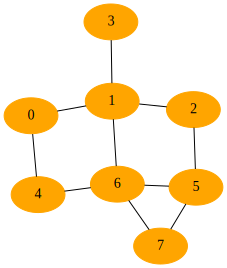

In [26]:
G, labeled = readAdjl("ejercicio.adjl", haslabels=True)
adjlShow(G, labeled)

In [27]:
%%file ejercicio.adjm
0 1 0 0 1 0 0 0
1 0 1 1 0 0 1 0
0 1 0 0 0 1 0 0
0 1 0 0 0 0 0 0
1 0 0 0 0 0 1 0
0 0 1 0 0 0 1 1
0 1 0 0 1 0 0 1
0 0 0 0 0 1 1 0

Writing ejercicio.adjm


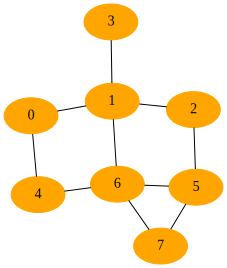

In [28]:
G = np.loadtxt("ejercicio.adjm")
adjmShow(G)

In [29]:
def isfull(G):
  n = len(G)
  for u in range(n):
    for v in range(n):
      if u != v and G[u, v] == 0:
        return False
  return True

In [30]:
isfull(M2)

False

In [31]:
%%file full.adjm
0 1 1 1
1 0 1 1
1 1 0 1
1 1 1 0

Writing full.adjm


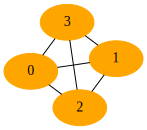

In [32]:
G = np.loadtxt("full.adjm")
adjmShow(G)

In [33]:
isfull(G)

True

In [34]:
%%file notfull.adjm
1 0 1 1
1 0 1 1
1 1 0 1
1 1 1 0

Writing notfull.adjm


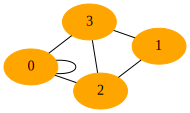

In [35]:
G = np.loadtxt("notfull.adjm")
adjmShow(G)

In [36]:
isfull(G)

False